# **Análisis de Accidentes de Tránsito**

## **Introducción**
Este proyecto tiene como objetivo realizar un análisis detallado de un conjunto de datos sobre accidentes de tránsito. El análisis se centrará en identificar patrones, tendencias y factores clave que influyen en la ocurrencia y severidad de los accidentes.

El conjunto de datos contiene información detallada sobre los accidentes, incluidas las condiciones climáticas, de iluminación, las características de la vía y las lesiones. Este análisis puede ser útil para diseñar estrategias de prevención y toma de decisiones basadas en datos.

---

## **Objetivos del Proyecto**
1. **Entender la distribución general de los accidentes.**
   - Analizar la frecuencia de accidentes a lo largo del tiempo (meses, días de la semana, horas).

2. **Analizar los factores de riesgo**
   - Explorar cómo las condiciones climáticas, de iluminación y del tráfico están relacionadas con la severidad de los accidentes.

3. **Evaluar los factores que agravan los accidentes.**
   - Determinar el impacto de factores como el tipo de choque, las condiciones de la vía, el estado de la superficie y la cantidad de vehículos involucrados en la severidad de las lesiones.

5. **Identificar Tendencias de los Tipos de Lesiones a lo Largo del Tiempo**
   - Analizar la evolución en el tiempo de la cantidad de cada tipo de lesión, para descubrir si existe alguna posible tendencia. 

6. **Generar visualizaciones informativas.**
   - Crear gráficos para comunicar hallazgos de manera clara y efectiva.

---

In [3]:
#Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime 
import matplotlib.dates as mdates

In [5]:
#Carga del archivo
df = pd.read_csv(r"C:\Users\Tiki\OneDrive\Escritorio\Portfolio\Python\Accidentes de tráfico\traffic_accidents.csv")

In [16]:
#Análisis exploratorio de los datos (EDA)
df.head(5)

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0,2023-07-29 13:00:00,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,13,7,7
1,2023-08-13 00:11:00,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0,1,8
2,2021-12-09 10:30:00,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,10,5,12
3,2023-08-09 19:55:00,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,5.0,0.0,0.0,5.0,0.0,0.0,19,4,8
4,2023-08-19 14:55:00,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,14,7,8


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209306 entries, 0 to 209305
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   crash_date                     209306 non-null  datetime64[ns]
 1   traffic_control_device         209306 non-null  object        
 2   weather_condition              209306 non-null  object        
 3   lighting_condition             209306 non-null  object        
 4   first_crash_type               209306 non-null  object        
 5   trafficway_type                209306 non-null  object        
 6   alignment                      209306 non-null  object        
 7   roadway_surface_cond           209306 non-null  object        
 8   road_defect                    209306 non-null  object        
 9   crash_type                     209306 non-null  object        
 10  intersection_related_i         209306 non-null  object        
 11  

**La columna "crash_date" debe estar en formato fecha, por lo que voy a cambiarle el tipo de dato.**

In [ ]:
df['crash_date'] = pd.to_datetime(df['crash_date'], errors='coerce')


**Estadísticas descriptivas para las columnas numéricas.**

In [31]:
df.describe()

,crash_date,num_units,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
count,209306,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000
mean,2020-12-08 23:26:35.213802240,2.063300,0.382717,0.001859,0.038102,0.221241,0.121516,2.244002,13.373047,4.144024,6.771822
min,2013-03-03 16:48:00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,2018-12-03 10:18:45,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,9.000000,2.000000,4.000000
50%,2020-12-19 16:39:00,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,14.000000,4.000000,7.000000
75%,2023-01-08 02:33:45,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,17.000000,6.000000,10.000000
max,2025-01-18 00:17:00,11.000000,21.000000,3.000000,7.000000,21.000000,15.000000,49.000000,23.000000,7.000000,12.000000
std,NaN,0.396012,0.799720,0.047502,0.233964,0.614960,0.450865,1.241175,5.603830,1.966864,3.427593


**Verifico la cantidad de valores nulos por columna.**

In [33]:
df.isnull().sum()

crash_date                       0
traffic_control_device           0
weather_condition                0
lighting_condition               0
first_crash_type                 0
trafficway_type                  0
alignment                        0
roadway_surface_cond             0
road_defect                      0
crash_type                       0
intersection_related_i           0
damage                           0
prim_contributory_cause          0
num_units                        0
most_severe_injury               0
injuries_total                   0
injuries_fatal                   0
injuries_incapacitating          0
injuries_non_incapacitating      0
injuries_reported_not_evident    0
injuries_no_indication           0
crash_hour                       0
crash_day_of_week                0
crash_month                      0
dtype: int64

**Verifico la cantidad de columnas duplicadas.**

In [35]:
df.duplicated().sum()

31

**Reviso las filas duplicadas pora corroborar si afectan al análisis.**

In [37]:
df[df.duplicated()]

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
35141,2018-08-31 14:30:00,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,14,6,8
40269,2024-07-17 21:15:00,TRAFFIC SIGNAL,CLEAR,DUSK,SIDESWIPE SAME DIRECTION,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,21,4,7
43671,2022-02-14 11:00:00,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,11,2,2
49142,2020-05-19 23:42:00,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,3.0,0.0,0.0,3.0,0.0,1.0,23,3,5
51273,2023-09-04 17:59:00,STOP SIGN/FLASHER,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT ON GRADE,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,6.0,17,2,9
64682,2023-09-06 16:27:00,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,2.0,0.0,0.0,2.0,0.0,0.0,16,4,9
75198,2020-02-14 15:48:00,STOP SIGN/FLASHER,CLEAR,DAYLIGHT,PEDESTRIAN,NOT DIVIDED,STRAIGHT AND LEVEL,SNOW OR SLUSH,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,INCAPACITATING INJURY,2.0,0.0,1.0,0.0,1.0,0.0,15,6,2
90336,2024-08-13 06:30:00,NO CONTROLS,CLEAR,DAWN,TURNING,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,5.0,6,3,8
117677,2018-12-22 13:40:00,STOP SIGN/FLASHER,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,13,7,12
123605,2022-06-20 19:30:00,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,19,2,6


**Exploración de Valores Categóricos para detectar errores o inconsistencias.**

In [53]:
#Ver la distribución de los valores de cada columna
for col in df.select_dtypes(include='object').columns:
    print(f"distribución de {col}: ")
    print(df[col].value_counts())
    print("\n")

distribución de traffic_control_device: 
traffic_control_device
TRAFFIC SIGNAL              123944
STOP SIGN/FLASHER            49139
NO CONTROLS                  29508
UNKNOWN                       4455
OTHER                          670
YIELD                          468
PEDESTRIAN CROSSING SIGN       247
OTHER REG. SIGN                181
LANE USE MARKING               153
FLASHING CONTROL SIGNAL        150
POLICE/FLAGMAN                 104
OTHER WARNING SIGN              95
RAILROAD CROSSING GATE          78
SCHOOL ZONE                     33
OTHER RAILROAD CROSSING         23
RR CROSSING SIGN                18
DELINEATORS                     17
NO PASSING                      12
BICYCLE CROSSING SIGN           11
Name: count, dtype: int64


distribución de weather_condition: 
weather_condition
CLEAR                       164700
RAIN                         21703
CLOUDY/OVERCAST               7533
SNOW                          6871
UNKNOWN                       6534
OTHER         

# Visualización Inicial

**Histograma de accidentes por hora:**

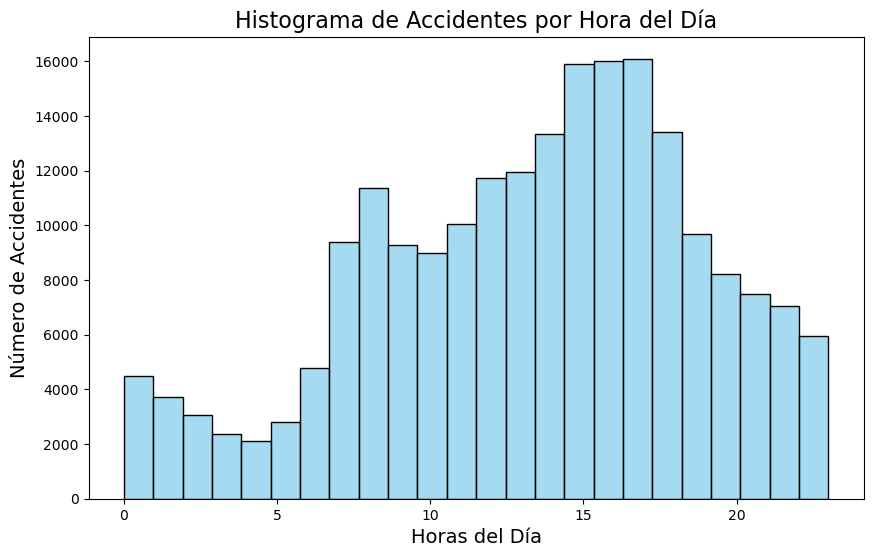

In [68]:
plt.figure(figsize=(10,6))
sns.histplot(df['crash_hour'], bins=24, kde=False, color='skyblue', edgecolor='black')
plt.title("Histograma de Accidentes por Hora del Día", fontsize=16)
plt.xlabel("Horas del Día", fontsize=14)
plt.ylabel("Número de Accidentes", fontsize=14)
plt.show()

**Distribución de accidentes por día de la semana:**

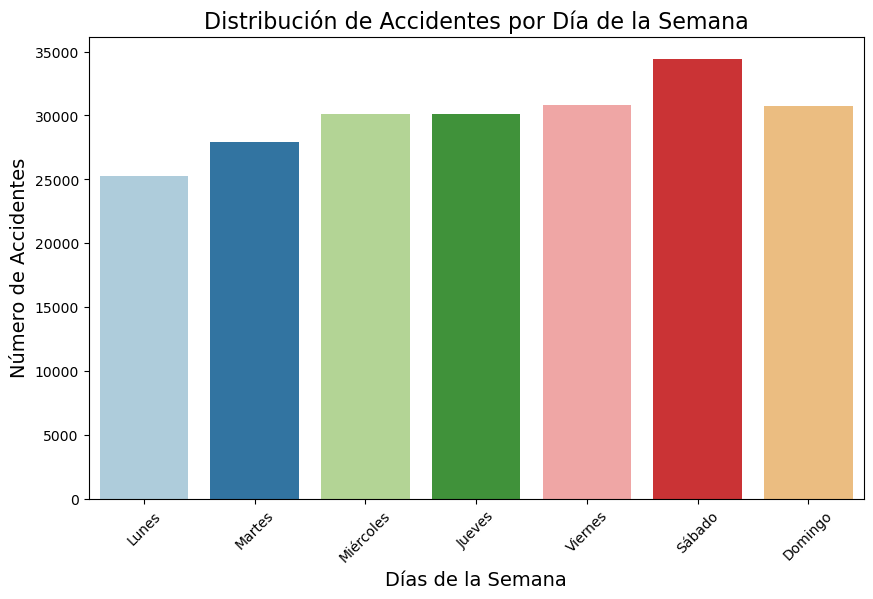

In [67]:
plt.figure(figsize=(10,6))
sns.countplot(x='crash_day_of_week', hue='crash_day_of_week', data=df, palette='Paired', legend=False)
plt.title("Distribución de Accidentes por Día de la Semana", fontsize=16)
plt.xlabel("Días de la Semana", fontsize=14)
plt.ylabel("Número de Accidentes", fontsize=14)
plt.xticks(ticks=range(7), labels=['Lunes','Martes','Miércoles','Jueves','Viernes','Sábado','Domingo'], rotation=45)
plt.show()

**Distribución de accidentes por mes**

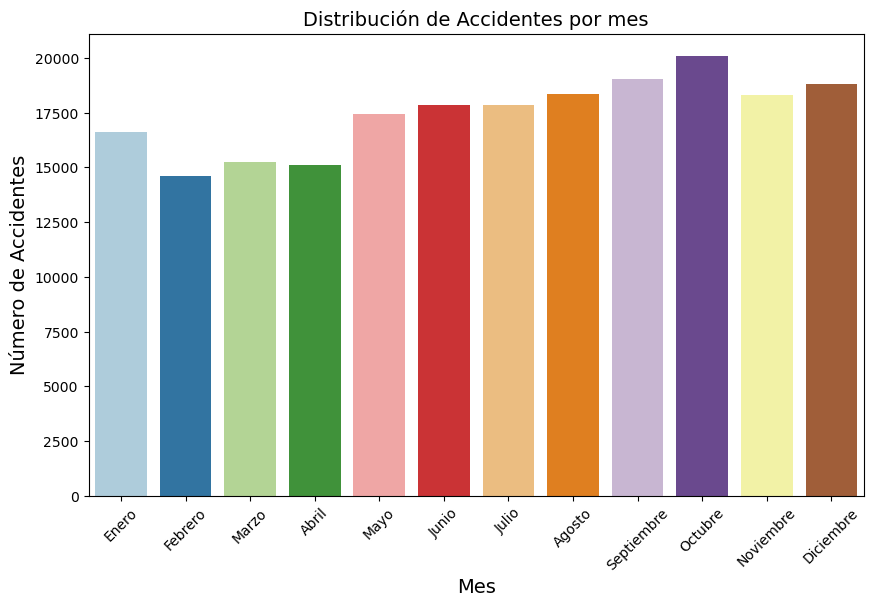

In [69]:
plt.figure(figsize=(10,6))
sns.countplot(x='crash_month', hue='crash_month', data=df, palette='Paired', legend=False)
plt.title("Distribución de Accidentes por mes", fontsize=14)
plt.xlabel("Mes", fontsize=14)
plt.ylabel("Número de Accidentes", fontsize=14)
plt.xticks(ticks=range(12), labels=['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre'], rotation = 45)
plt.show()

# Conclusiones Iniciales

**Luego del análisis exploratorio realizado, puedo confirmar que los datos se encuentran libres de errores, limpios y con el formato correcto para realizar el análisis.**

## Principales Hallazgos:

- 📌 **La mayor cantidad de accidentes de tránsito ocurre entre las 15 y las 17 hs**, aunque la hora promedio en la que suceden es **13:37 hs**.
- 📆 **El sábado es el día con más accidentes**, seguido por el viernes y el domingo. Esto puede deberse a una mayor cantidad de vehículos circulando por el fin de semana.
- 🍂 **Octubre es el mes con mayor cantidad de accidentes**, seguido de septiembre y diciembre.
- 🚗 **En promedio, la cantidad de vehículos involucrados en los accidentes es 2**. Además, el promedio de lesiones por accidente es **0.38**, mientras que el de lesiones fatales por accidente es **0.00185**, lo que indica **una baja fatalidad**.

## **Matriz de Correlación para evaluar si hay correlaciones entre la cantidad de vehículos involucrados, el número de lesiones, el horario del accidente, etc.**

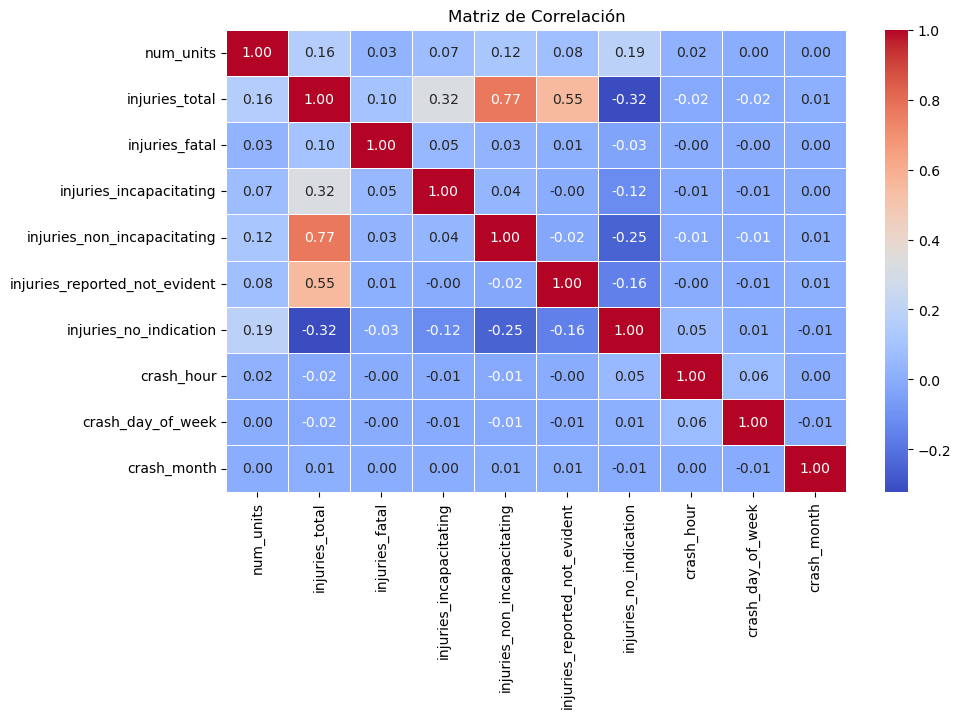

In [31]:
num_cols = ['num_units', 'injuries_total', 'injuries_fatal', 'injuries_incapacitating', 
            'injuries_non_incapacitating', 'injuries_reported_not_evident', 'injuries_no_indication', 
            'crash_hour', 'crash_day_of_week', 'crash_month']

matriz_correlacion = df[num_cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(matriz_correlacion, annot=True,cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()

# **Análisis de Factores de Riesgo**
**Para entender qué factores están asociados con una mayor severidad de lesiones.**


**Relación entre condiciones climáticas y cantidad total de lesiones**

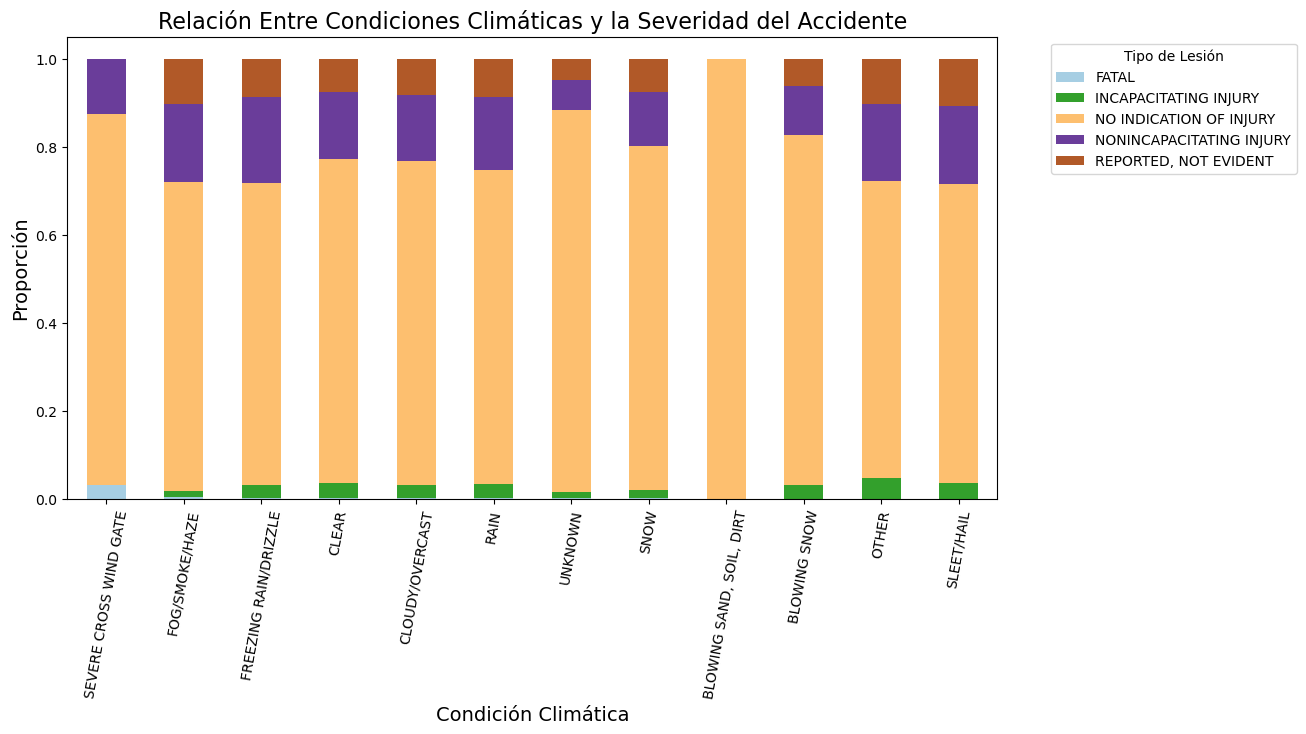

In [79]:
cross_tab = pd.crosstab(df['weather_condition'], df['most_severe_injury'], normalize='index')
cross_tab = cross_tab.sort_values(by='FATAL', ascending=False)
cross_tab.plot(kind='bar', stacked=True, colormap='Paired', figsize=(12,6))
plt.title("Relación Entre Condiciones Climáticas y la Severidad del Accidente", fontsize=16)
plt.xlabel("Condición Climática", fontsize=14)
plt.ylabel("Proporción", fontsize=14)
plt.xticks(rotation=80)
plt.legend(title="Tipo de Lesión", bbox_to_anchor=(1.05,1), loc="upper left")
plt.show()

## **Relación entre el Tipo de Camino y la Severidad del Accidente**

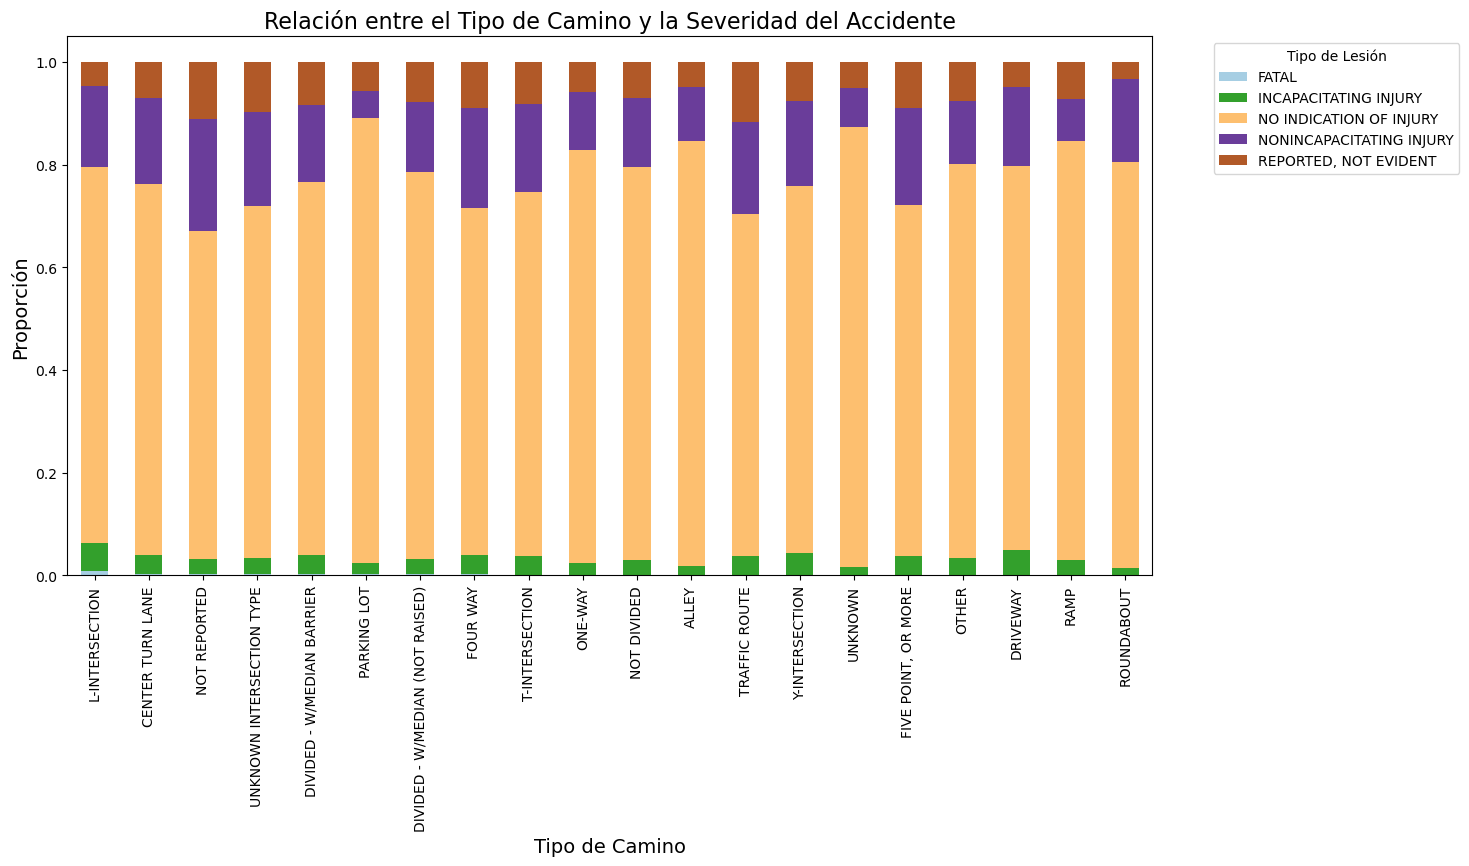

In [81]:
cross_tab = pd.crosstab(df['trafficway_type'], df['most_severe_injury'], normalize='index')
cross_tab = cross_tab.sort_values(by=['FATAL', 'INCAPACITATING INJURY'], ascending=False)
cross_tab.plot(kind='bar', stacked=True, colormap='Paired',figsize=(14,7))
plt.title("Relación entre el Tipo de Camino y la Severidad del Accidente", fontsize=16)
plt.xlabel("Tipo de Camino", fontsize=14)
plt.ylabel("Proporción", fontsize=14)
plt.legend(title='Tipo de Lesión', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

## **Relación entre las condiciones lumínicas y la Severidad del Accidente**

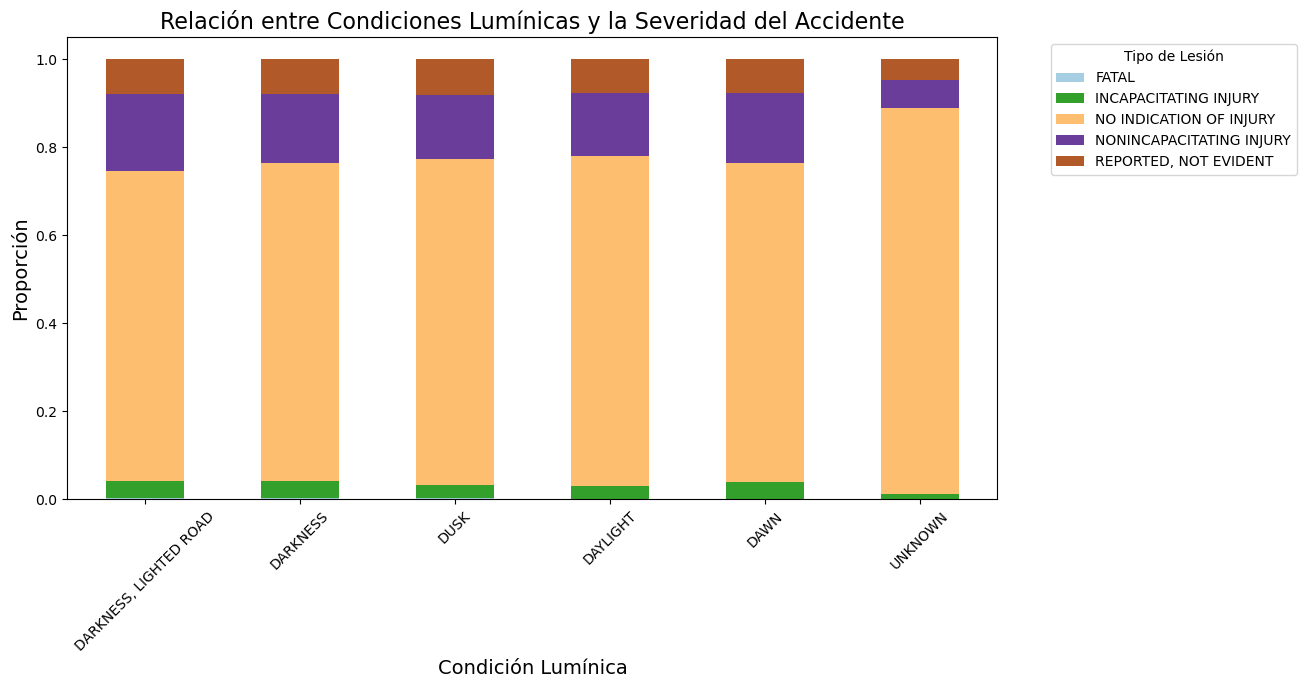

In [83]:
cross_tab = pd.crosstab(df['lighting_condition'], df['most_severe_injury'], normalize='index')
cross_tab = cross_tab.sort_values(by='FATAL', ascending=False)
cross_tab.plot(kind='bar', stacked=True, colormap='Paired', figsize=(12,6))
plt.title("Relación entre Condiciones Lumínicas y la Severidad del Accidente", fontsize=16)
plt.xlabel("Condición Lumínica", fontsize=14)
plt.ylabel("Proporción", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Tipo de Lesión", bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

## Conclusiones de los Factores de Riesgo Asociados a la Severidad de los Accidentes  

### 1️⃣ Condiciones Climáticas 🌦️  
- El **viento cruzado severo** es el factor climático con **mayor cantidad de lesiones fatales**.  
- Le siguen la **neblina** y la **lluvia helada**, que también presentan un alto riesgo.  

### 2️⃣ Tipo de Camino 🛣️  
- Las **intersecciones en L** tienen la mayor cantidad de **lesiones fatales**. Esto puede deberse a la falta de señalizaciones y/o semáforos, elementos esenciales en este tipo de intersecciones. 
- Les siguen los caminos con **carril de giro central** y aquellos **divididos con una barrera mediana**. El primero podría deberse a la falta de elementos de control de tránsito, ya que en este tipo de carriles el vehículo que gira debe esperar el paso. En cuanto a los caminos divididos con una barrera mediana, esto puede deberse a una mala señalización de la misma.

### 3️⃣ Condiciones Lumínicas 💡  
- **Los caminos iluminados** sorprendentemente presentan la mayor cantidad de **lesiones graves**, por lo que hay que tener en cuenta el factor del error humano.  
- La **oscuridad** y el **crepúsculo** también se asocian con una mayor severidad en los accidentes. En estos casos se puede deber a la falta de iluminación en los caminos.  


## **Análisis del impacto de las condiciones de la superficie del camino, el primer tipo de choque en las lesiones, y la cantidad de vehículos involucrados en el accidente en la severidad de las lesiones**

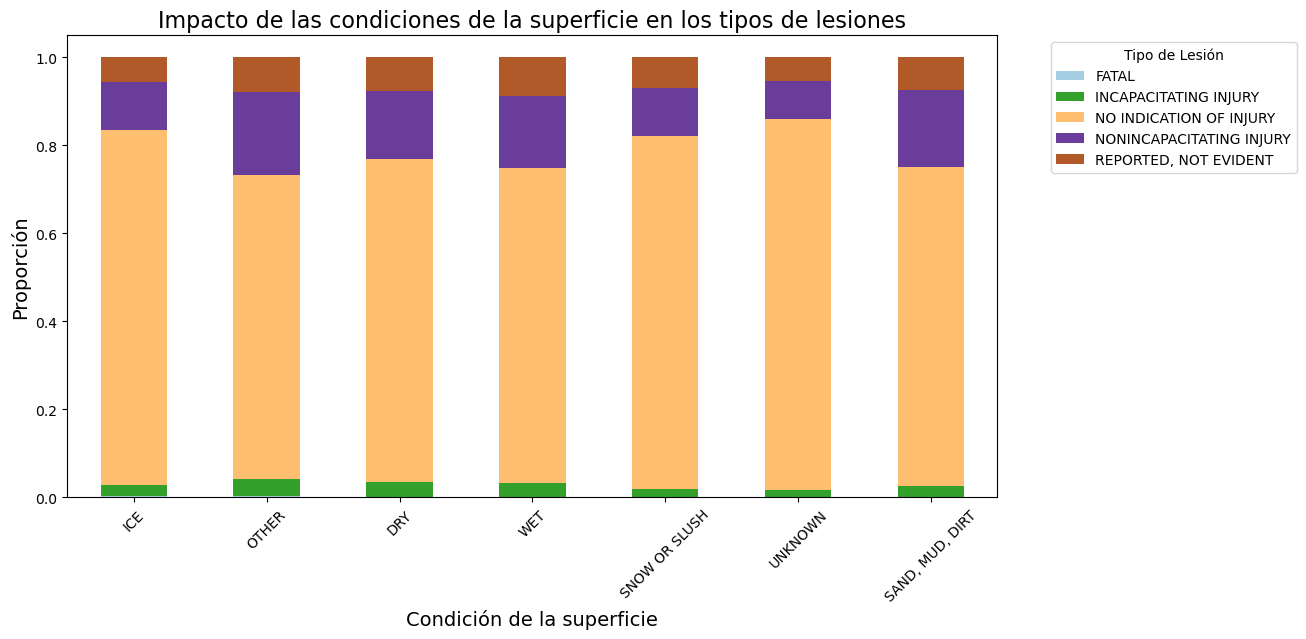

In [85]:
road_tab = pd.crosstab(df['roadway_surface_cond'], df['most_severe_injury'], normalize='index')
road_tab = road_tab.sort_values(by='FATAL', ascending=False)
road_tab.plot(kind='bar', stacked=True, colormap='Paired', figsize=(12,6))
plt.title("Impacto de las condiciones de la superficie en los tipos de lesiones", fontsize=16)
plt.xlabel("Condición de la superficie", fontsize=14)
plt.ylabel("Proporción", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Tipo de Lesión", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

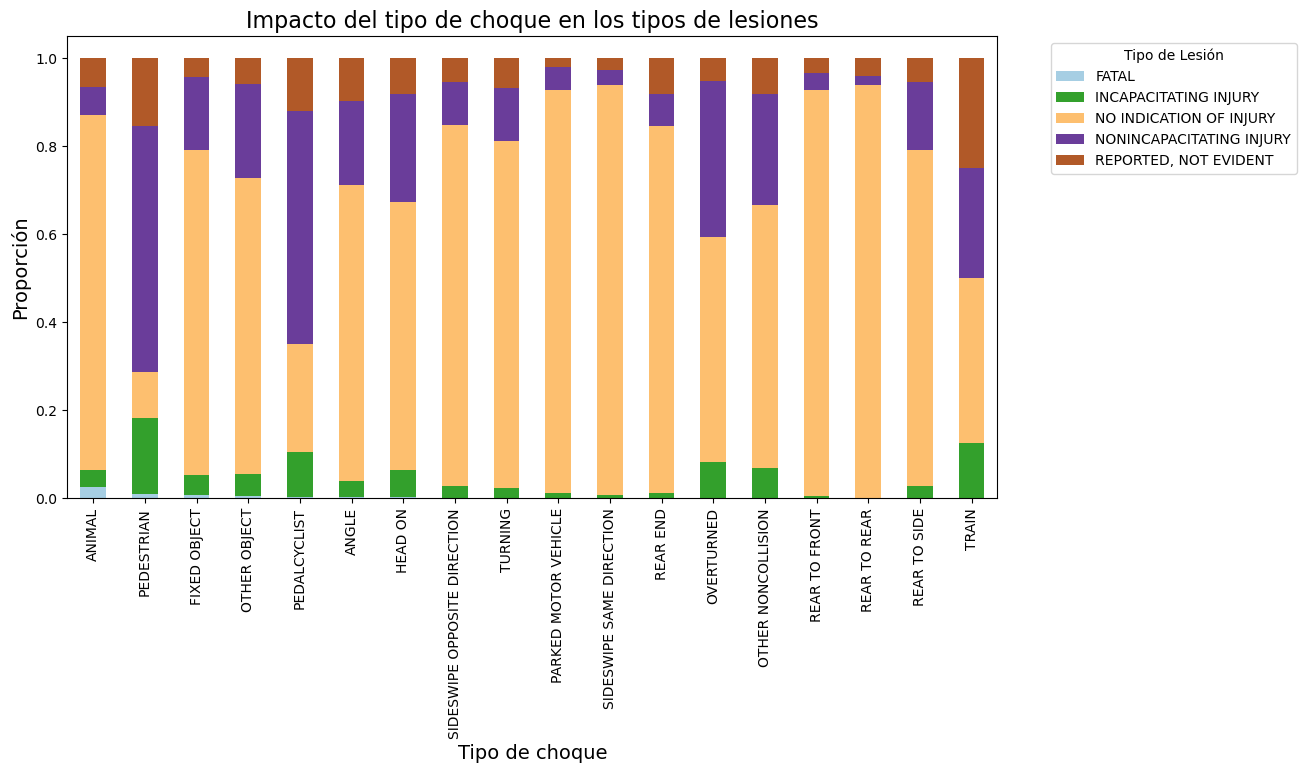

In [87]:
crash_tab = pd.crosstab(df['first_crash_type'], df['most_severe_injury'], normalize='index')
crash_tab = crash_tab.sort_values(by='FATAL', ascending=False)
crash_tab.plot(kind='bar', stacked=True, colormap='Paired', figsize=(12,6))
plt.title("Impacto del tipo de choque en los tipos de lesiones", fontsize=16)
plt.xlabel("Tipo de choque", fontsize=14)
plt.ylabel("Proporción", fontsize=14)
plt.xticks(rotation=90)
plt.legend(title="Tipo de Lesión", bbox_to_anchor=(1.05,1), loc="upper left")
plt.show()

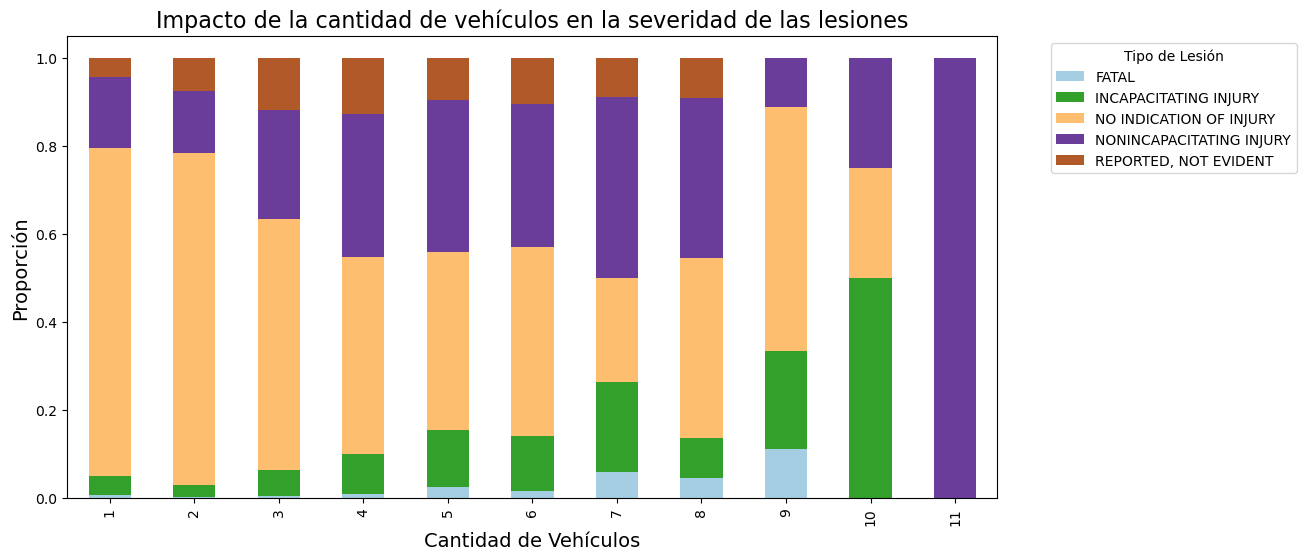

In [89]:
acc_tab = pd.crosstab(df['num_units'], df['most_severe_injury'], normalize='index')
acc_tab.plot(kind='bar', stacked=True, colormap='Paired', figsize=(12,6))
plt.title("Impacto de la cantidad de vehículos en la severidad de las lesiones", fontsize=16)
plt.xlabel("Cantidad de Vehículos", fontsize=14)
plt.ylabel("Proporción", fontsize=14)
plt.legend(title="Tipo de Lesión", bbox_to_anchor=(1.05,1), loc="upper left")
plt.show()

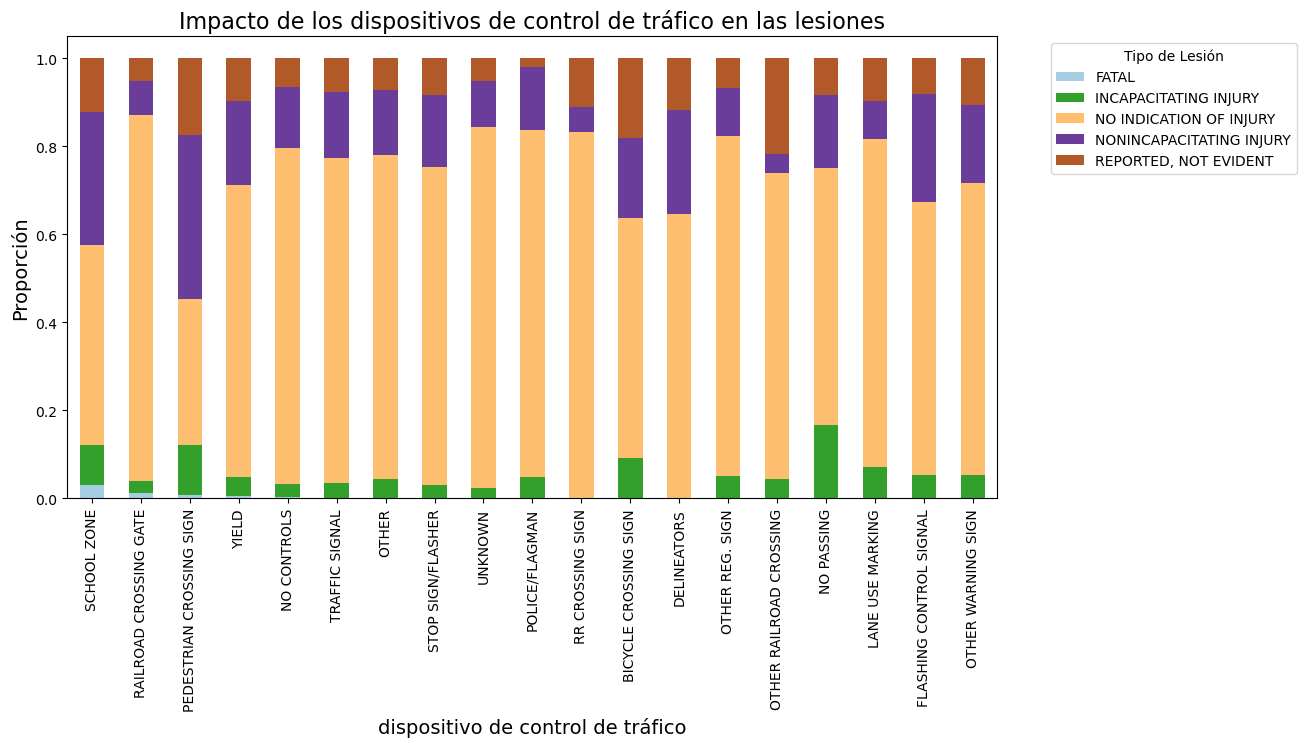

In [91]:
signal_tab = pd.crosstab(df['traffic_control_device'], df['most_severe_injury'], normalize='index')
signal_tab = signal_tab.sort_values(by='FATAL', ascending=False)
signal_tab.plot(kind='bar', stacked=True, colormap='Paired', figsize=(12,6))
plt.title("Impacto de los dispositivos de control de tráfico en las lesiones", fontsize=16)
plt.xlabel("dispositivo de control de tráfico", fontsize=14)
plt.ylabel("Proporción", fontsize=14)
plt.xticks(rotation=90)
plt.legend(title="Tipo de Lesión", bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

## Conclusiones del Análisis de Factores en la Severidad de las Lesiones  

### 1. Condiciones de la Superficie del Camino  
- Aunque la superficie con **hielo** tiene una baja tasa de fatalidad, es la que más **lesiones fatales** provoca.  
- Las **lesiones incapacitantes** ocurren con mayor frecuencia en **suelo seco y húmedo**.  

### 2. Tipo de Choque y Severidad de las Lesiones  
- Los **choques contra animales** son los que más **lesiones fatales** generan.  
- Les siguen en gravedad los choques **peatonales** y contra **objetos fijos**.  

### 3. Cantidad de Vehículos Involucrados  
- El mayor número de **lesiones fatales** ocurre en accidentes con **9 vehículos involucrados**, seguido de **7 y 8 vehículos**.  
- Curiosamente, en accidentes con **10 vehículos** no hubo lesiones fatales, solo **incapacitantes**, lo que sugiere que este factor no es determinante para la fatalidad.  

### 4. Dispositivo de Control de Tráfico  
- Las **zonas escolares** son donde se registran más **lesiones fatales**.  
- Le siguen los **cruces de ferrocarril** y las **señales de cruce de peatones**.  


## **Visualizaciones para descubrir cuáles son los tipos de caminos más peligrosos (con más cantidad de accidentes) y analizar la distribución de los tipos de accidentes**

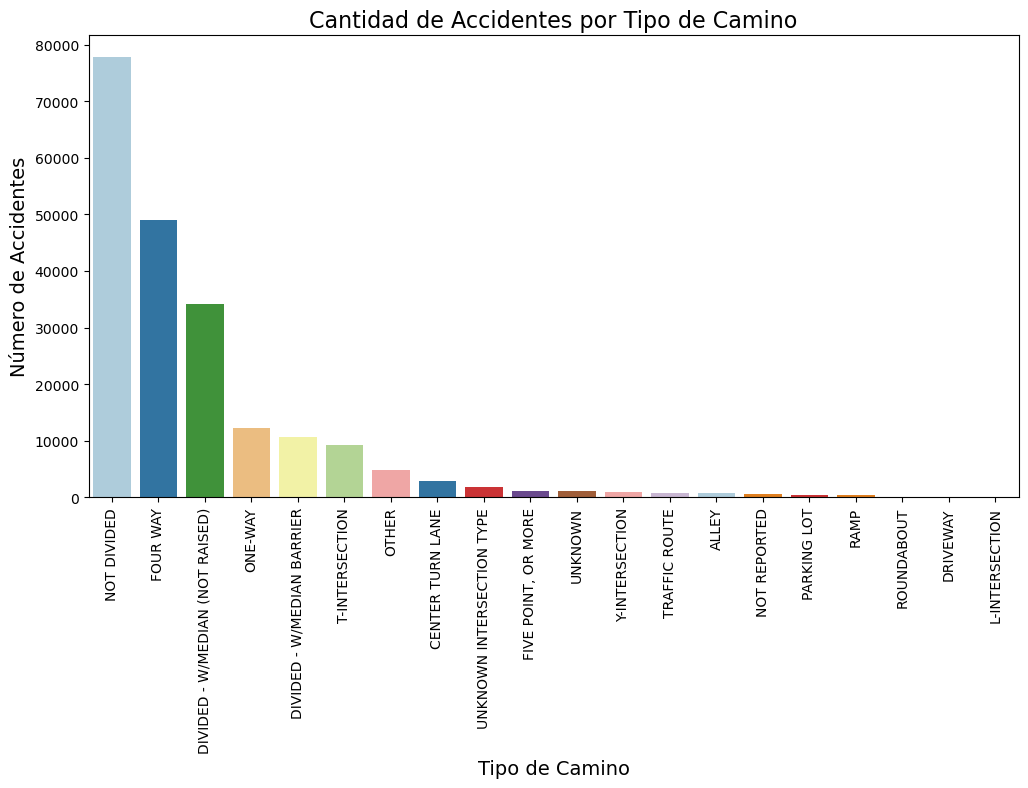

In [93]:
ordered_df = df['trafficway_type'].value_counts().reset_index()
ordered_df.columns = ['trafficway_type', 'count']
ordered_df = ordered_df.sort_values(by='count', ascending=False)
categorias_ord = ordered_df['trafficway_type']
plt.figure(figsize=(12,6))
sns.countplot(x='trafficway_type', hue='trafficway_type', data=df, palette='Paired', order=categorias_ord, legend=False)
plt.title("Cantidad de Accidentes por Tipo de Camino", fontsize=16)
plt.xlabel("Tipo de Camino", fontsize=14)
plt.ylabel("Número de Accidentes", fontsize=14)
plt.xticks(rotation=90)
plt.show()

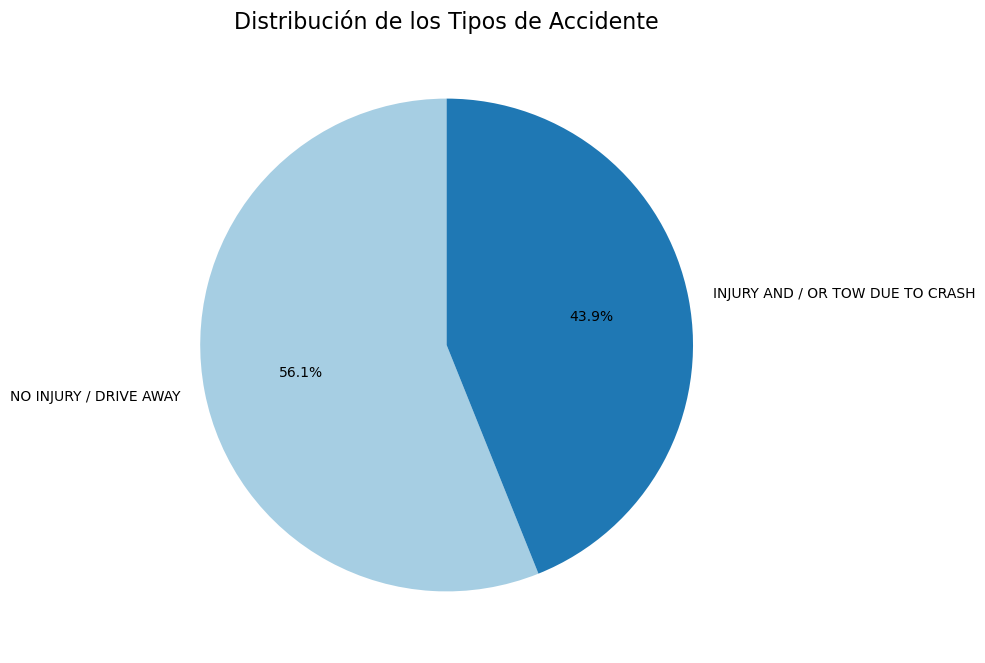

In [95]:
conteo_tipo_acc = df['crash_type'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(conteo_tipo_acc, labels = conteo_tipo_acc.index, autopct='%1.1f%%',colors=plt.cm.Paired.colors, startangle=90)
plt.title("Distribución de los Tipos de Accidente", fontsize=16)
plt.show()

## Conclusiones sobre la Peligrosidad de los Tipos de Caminos y la Distribución de los Accidentes  

### 1. Tipos de Caminos con Mayor Cantidad de Accidentes  
- Los **caminos no divididos** son los que registran la mayor cantidad de **accidentes**.  
- Les siguen en frecuencia los caminos de **cuatro vías** y los caminos **divididos con mediana (no elevada)**.  

### 2. Distribución de los Tipos de Accidentes  
- En el **56,1% de los accidentes**, no hay heridos y los conductores continúan manejando.  
- En el **43,9% de los casos**, hay **lesiones y/o remolque** debido al accidente.  


## **Gráfico de Lineas para Analizar Tendencias en el Tipo de Lesiones:**

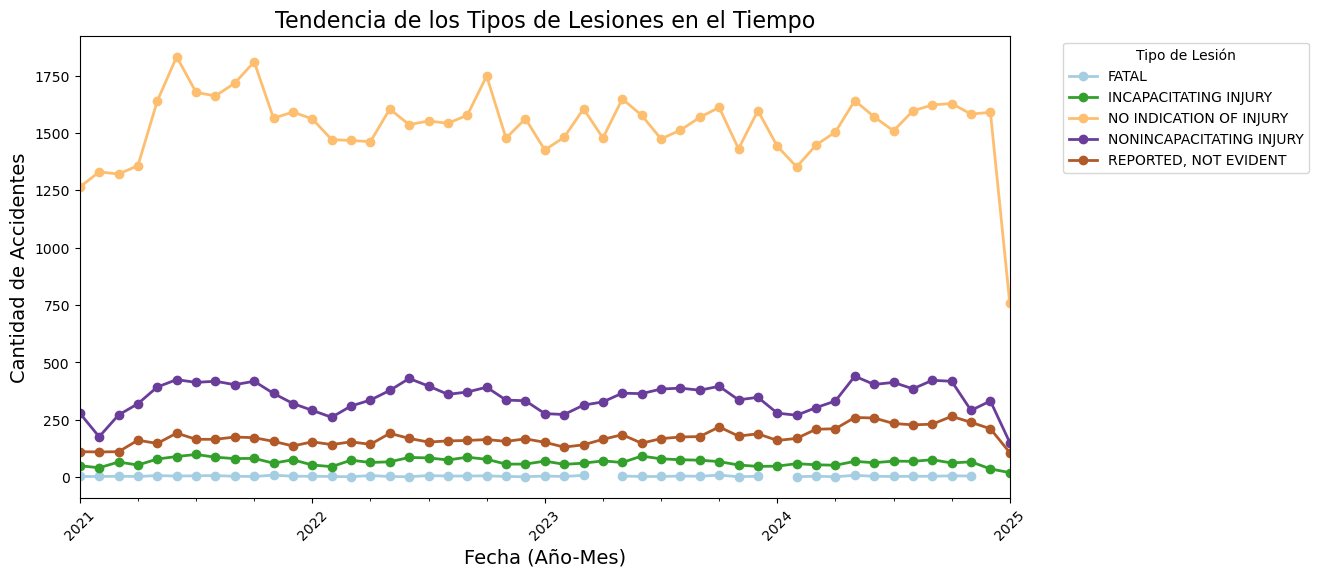

In [97]:
ultimo_anio = df['crash_date'].dt.year.max()
df_agrupado = df.groupby([df['crash_date'].dt.to_period('M'), 'most_severe_injury']).size().unstack()
df_ultimos_5 = df_agrupado.loc[str(ultimo_anio - 4):]
df_ultimos_5.plot(kind='line', marker='o', colormap='Paired', linewidth=2, figsize=(12,6))
plt.title("Tendencia de los Tipos de Lesiones en el Tiempo", fontsize=16)
plt.xlabel("Fecha (Año-Mes)", fontsize=14)
plt.ylabel("Cantidad de Accidentes", fontsize=14)
plt.legend(title="Tipo de Lesión", bbox_to_anchor=(1.05,1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

## Conclusiones sobre los tipos de lesiones a lo largo del tiempo
 
- Las **lesiones fatales** se mantuvieron estables a lo largo del tiempo, con una baja cantidad, lo cual es un buen indicio**.  
- Las **lesiones incapacitantes** han tenido leves fluctuaciones en sus cantidades a lo largo del tiempo, y en el último trimestre muestran un detrimento en su cantidad.
- Las **lesiones reportadas, no evidentes** y las **no incapacitantes** también muestran un decrecimiento en su cantidad en el último trimestre, aunque las lesiones no incapacitantes han sufrido más fluctuaciones a lo largo del tiempo.
- La **no indicación de lesiones** ha predominado sobre los demás tipos a lo largo del tiempo, sufriendo variadas fluctuaciones, esto puede indicar que en general los accidentes no producen complicaciones mayores a los involucrados.

# 📌 Recomendaciones Finales

## 🚔 Aumento de Controles de Tránsito  
Aumentar los controles de tránsito en zonas de alto riesgo los fines de semana en los horarios con mayor frecuencia de accidentes podría ayudar a disminuirlos. Esto podría incluir:  
- Mayor presencia policial en puntos críticos.  
- Implementación de radares de velocidad en horarios clave.  
- Campañas de concientización en redes sociales y medios locales los fines de semana.  

## 🌦️ Precauciones en Clima Hostil  
En tiempos de clima hostil donde hay fuertes vientos, lluvias heladas, neblinas y hielo, es importante aumentar las precauciones, tanto en señalizaciones y controles de tránsito como en la prevención a través de la concientización. Se recomienda:  
- Uso de cadenas para caminos con nieve.  
- Uso de balizas y luces para la neblina.  
- Circular a una velocidad prudente.  
- Monitoreo en tiempo real de las condiciones climáticas.  
- Emisión de alertas viales a través de aplicaciones móviles, radio y redes sociales.  

## 🚦 Mejora en Señalización y Semáforos  
Realizar esfuerzos en colocar semáforos o mejorar su funcionamiento mediante señales de tránsito en aquellos caminos con intersecciones en L y en carriles de giro central, ya que son los más peligrosos. Esto podría incluir:  
- Instalación de reductores de velocidad en estas intersecciones.  
- Evaluación de la sincronización de semáforos inteligentes, que ajustan los tiempos de espera según el tráfico.  
- Asegurar la correcta visualización de elementos de seguridad como las barreras medianas.  

## 💡 Optimización de la Iluminación Vial  
Es importante asegurar la correcta implementación de la iluminación en las vías, desde la calidad hasta el momento en donde comienzan a funcionar, dado que hay momentos del año en los que el crepúsculo llega antes. Se recomienda:  
- Evaluación de la intensidad y posicionamiento de las luminarias.  
- Asegurar que la iluminación no genere reflejos o zonas de penumbra.  

## 🦌 Protección de Fauna en Zonas de Riesgo  
Realizar un relevamiento de zonas donde existe la presencia de animales para colocar su señalización pertinente. Además, analizar la posibilidad de:  
- Construcción de pasos de fauna elevados o túneles en zonas críticas.  

## 🚸 Seguridad en Zonas Escolares y Cruces Peatonales  
Para reducir la velocidad de los vehículos en zonas con cruces peatonales, de ferrocarril y de escuelas, se recomienda:  
- Implementación de luces intermitentes.  
- Colocación de pasos peatonales elevados con iluminación LED.  
- Complementar estas medidas con una correcta señalización.  
